<a href="https://colab.research.google.com/github/ghdakrk/computr_vision/blob/main/1_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
import cv2
cv2.__version__

'4.1.2'

In [3]:
'''
cv2.IMREAD_COLOR : 이미지 파일을 컬러로 읽어들인다.
cv2.IMREAD_GRAYSCALE : 그레이 스케일로 읽는다.(중간당계 처리)
cv2.IMREAD_UNCHANGED : 이미지  파일을 알파채널까지 포함해 읽는다
'''

'\ncv2.IMREAD_COLOR : 이미지 파일을 컬러로 읽어들인다.\ncv2.IMREAD_GRAYSCALE : 그레이 스케일로 읽는다.(중간당계 처리)\ncv2.IMREAD_UNCHANGED : 이미지  파일을 알파채널까지 포함해 읽는다\n'

In [4]:
import skimage.data
img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

In [5]:
# bgr > rgb
b, g, r = cv2.split(img_astro)
img_astro_rgb = cv2.merge([r,g,b])

(<matplotlib.image.AxesImage at 0x7f7906682250>,
 <matplotlib.image.AxesImage at 0x7f7906641250>)

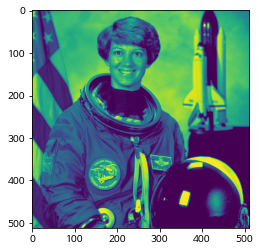

In [6]:
import matplotlib.pyplot as plt
plt.imshow(b), plt.imshow(r)

In [7]:
img_astro_gray = cv2.cvtColor(img_astro_rgb, cv2.COLOR_BGR2GRAY)

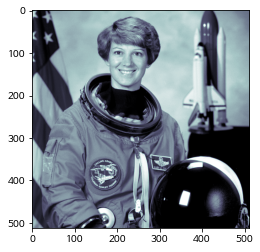

In [8]:
plt.imshow(img_astro_gray, cmap=plt.cm.bone)

In [9]:
cv2.imwrite("./gray_astronaut.png", img_astro_gray)

True

In [10]:
# resize, rotate, crop...

In [11]:
#binary(이진화)

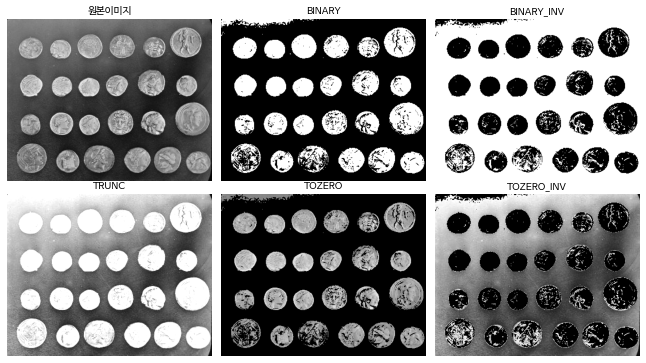

In [12]:
from skimage.data import coins
img = coins()

maxval = 255
thresh = maxval / 2

_, thresh1 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)

titles = ['원본이미지', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(9,5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontdict={'fontsize': 10})
    plt.axis("off")

plt.tight_layout(pad=0.7)
plt.show()

In [13]:
# 적응임계처리
from skimage.data import page
img = page()
th2 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 20)
th3 = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 20)

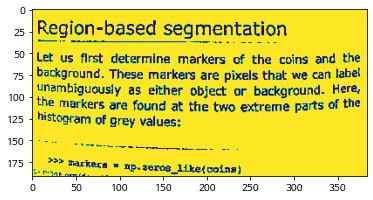

In [14]:
plt.imshow(th2)

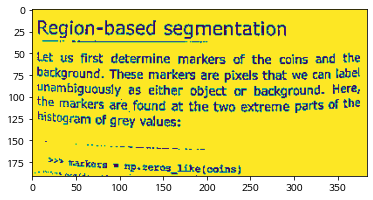

In [15]:
plt.imshow(th3)

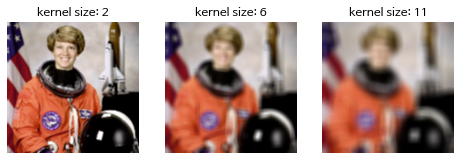

In [16]:
#filtering
# padding으로 원본과 사이즈가 같음
from skimage.data import astronaut
import numpy as np

img = astronaut()
img = cv2.resize(img, dsize=(150,150))

plt.figure(figsize=(8,3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k,k))/ k**2
    filtering = cv2.filter2D(img, -1, kernel)
    plt.subplot(1,3,i+1)
    plt.imshow(filtering)
    plt.title(f"kernel size: {k}")
    plt.axis("off")
plt.show()

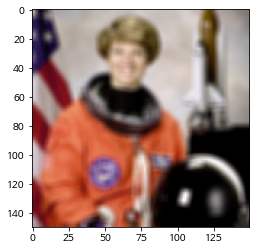

In [17]:
# blur(평균, 뭉개기)
blur = cv2.blur(img, (5,5))
plt.imshow(blur)

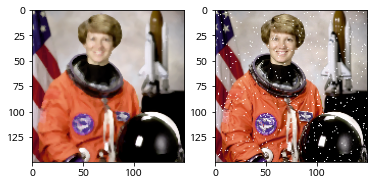

In [18]:
# 중앙값 블러
img_noise = img.copy()

np.random.seed(0)
N = 500
idx1 = np.random.randint(img.shape[0], size=N)
idx2 = np.random.randint(img.shape[1], size=N)
img_noise[idx1, idx2] = 255

img_denoise = cv2.medianBlur(img_noise, 3)
plt.subplot(121)
plt.imshow(img_denoise)
plt.subplot(122)
plt.imshow(img_noise)
plt.show()

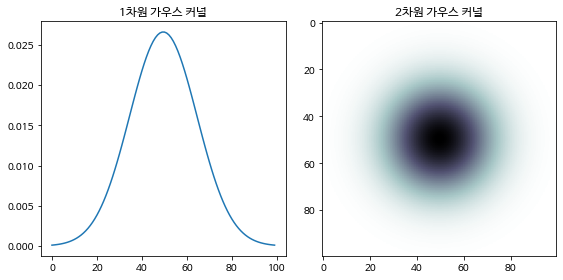

In [20]:
import matplotlib as mpl
#가우시안 블러 > 이미지전체뭉개기
gauss1d = cv2.getGaussianKernel(100, 15)
gauss2d = gauss1d @ gauss1d.T
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(gauss1d)
plt.grid(False)
plt.title("1차원 가우스 커널")
plt.subplot(122)
plt.imshow(gauss2d, cmap=mpl.cm.bone_r)
plt.grid(False)
plt.title("2차원 가우스 커널")
plt.tight_layout()
plt.show()


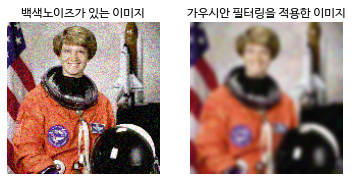

In [23]:
# 백색 잡음
img_noise = np.clip((img / 255 + np.random.normal(scale=0.1, size=img.shape)) * 255, 0, 255).astype(np.uint8)
# 가우시안 블러로 잡음 제거
img_denoise = cv2.GaussianBlur(img_noise, (9, 9), 2)
plt.subplot(1, 2, 1)
plt.imshow(img_noise)
plt.title("백색노이즈가 있는 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_denoise)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')
plt.show()

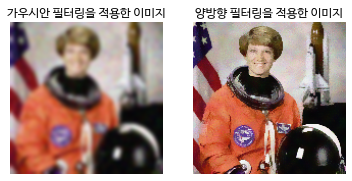

In [24]:
#양방향 필터 > 경계선을 살리며 블러
img_denoise1 = cv2.GaussianBlur(img_noise, (9, 9), 2)
img_denoise2 = cv2.bilateralFilter(img_noise, 9, 75, 75)
plt.subplot(1, 2, 1)
plt.imshow(img_denoise1)
plt.title("가우시안 필터링을 적용한 이미지")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_denoise2)
plt.title("양방향 필터링을 적용한 이미지")
plt.axis('off')
plt.show()

In [44]:
# 침식, 팽창, 합성방법

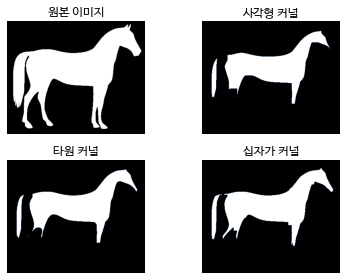

In [25]:
from skimage.data import horse
img = horse().astype('uint8')
img = np.ones(img.shape) - img
ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["사각형 커널", "타원 커널", "십자가 커널"]
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
 erosion = cv2.erode(img, kernel[i])
 plt.subplot(2, 2, i+2)
 plt.imshow(erosion, cmap='bone')
 plt.title(title[i])
 plt.axis('off')
plt.tight_layout()
plt.show()

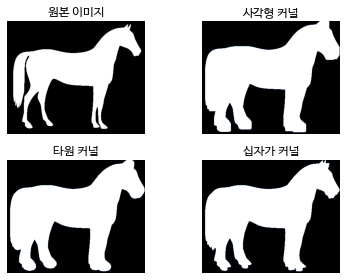

In [26]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
for i in range(3):
 erosion = cv2.dilate(img, kernel[i])
 plt.subplot(2, 2, i+2)
 plt.imshow(erosion, cmap='bone')
 plt.title(title[i])
 plt.axis('off')
plt.tight_layout()
plt.show()

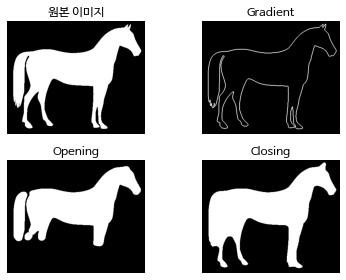

In [27]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, 
 cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, 
 cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
 cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)
images = [img, gradient, opening, closing]
titles = ["원본 이미지", 'Gradient', 'Opening', 'Closing']
for i in range(4):
 plt.subplot(2, 2, i+1)
 plt.imshow(images[i], cmap='gray')
 plt.title(titles[i])
 plt.axis('off')
plt.tight_layout()
plt.show()